<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 1</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mesbahamirhossein@gmail.com">Amirhossein Mesbah</a><br></font><br>
    </div>
</div>

# Numpy

### Question1: mean and std of numbers between 10 and 1000.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

a = np.arange(10, 1001)  # Including 1000
print(a[:5], "...", a[-5:])
print("mean:", np.mean(a), "std:", np.std(a))

[10 11 12 13 14] ... [ 996  997  998  999 1000]
mean: 505.0 std: 286.07691273501956


### Question2: nearest point to each random point.

In [2]:
np.random.seed(0)
points = np.random.rand(100, 10)
print("point0:", points[0])
subtraction = points - points[:, None]  # (100, 100, 10)
distances = np.linalg.norm(subtraction, axis=-1)  # (100, 100)
np.fill_diagonal(distances, np.inf)  # Eliminate self distance
nearest_indices = np.argmin(distances, axis=-1)
print("nearest_indices:", nearest_indices)

point0: [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
nearest_indices: [ 3 81  0 95 60 49  5 97 94 46 88 36 16 89 57 39 12 13 36 26 28 87  3 60
 93 36 19 72 20 53 86 77 52 40 65 69 11 89 92 15 33 70 66 46 11 65 81  0
  3 71 84 63 32 71 25 69 10 55 41 21  4 71 89 51 25 34 95 79 46 35 41 49
 27 90 66 50 38 31 46  4 36 46 48 97 50 90 22 21 98 13 73 97 38 35  8 66
 99 83 88 96]


### Question3: Histogram of distances.

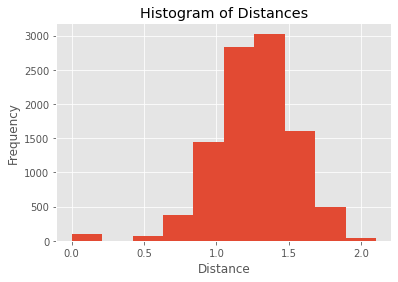

In [4]:
distances = np.linalg.norm(points - points[:, None], axis=-1)
# As not specified in the question, we plot all the pairwise distances 
# including i->j and j->i. (We could take the numpy.tril of matrix if needed)
plt.hist(distances.flatten())
plt.title("Histogram of Distances")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

<blockquote>

0 Bucket are the 100 self-distances equal to zero, and the rest are approximately shaping a normal distribution which is expected.

### Question4:

Execute the cell below. By running this cell, a dataset will be loaded from `patents.csv` file. In this notebook, you are asked to analyze this data in several ways. There are three numpy arrays in this dataset:

- `patent_number`: a unique identifier for each patetnt
- `patent features`: a vector of 16 features describing several properties of each patent
- `category`: the category to which a patent belongs


In [ ]:
! gdown 1bKVxCLlCNE1wCzVFqUTEIK6j5ht9XFVo
! unzip data.zip

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/patents.csv')
df.head()
patent_number = df['publication_number'].to_numpy()
patent_features = df['patent_embedding'].to_numpy()
temp = []
for i in range(patent_features.size):
    s = str(patent_features[i])
    s1 = s.replace(r'\n', '')
    temp.append(
        np.array(s.split()[1:-1], dtype='float')[:16]
    )

patent_features = np.stack(temp)
patent_category = df['category']
print(f"patent_features: {patent_features.shape}, {patent_features[0]}")
print(f"patent_number: {patent_number}")
print(f"patent_category: {patent_category.shape}, {np.unique(patent_category)}")

patent_features: (15689, 16), [ 0.00135472  0.01564001 -0.04858465  0.03986628 -0.04423689 -0.00215539
  0.01330717 -0.02743183  0.01634773  0.05035789 -0.02199074 -0.02577395
  0.00305165 -0.00588488  0.03504592 -0.05058029]
patent_number: ['US-2019250858-A1' 'US-1000462-A' 'KR-200146416-Y1' ... 'CA-2952951-A1'
 'CH-608317-A' 'CN-100513251-C']
patent_category: (15689,), [0 1 2 3 4 5 6 7]


#### Part1: Which patent has the highest norm? (Eucledian distance from origin)

In [7]:
patent_number[np.argmax(np.linalg.norm(patent_features, axis=-1))]

'CH-527846-A'

#### Part 2: Find the two patents that are the farthest from eachother

<blockquote>

sqrt(x) is monotone increasing, so comparing squared-distances is equivalent to comparing distances. We can ignore taking the sqrt in euclidean distance if we wish.

$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 }$

In [8]:
# Subtraction Matrix will be (15689, 15689, 16) 
# which for float32 will be 3.93GB*4 = 15.75GB, more than available RAM (So we use np.float16)
p = patent_features.astype(np.float16)  # Increase precision 
q = patent_features.astype(np.float16)[:, None]
distances = np.sum((p - q) ** 2, axis=-1)
i, j = np.unravel_index(distances.argmax(), distances.shape)
patent_number[i], patent_number[j]

('KR-100793527-B1', 'US-3240764-A')

#### Part 3: Write a function that, given a patent number, finds its nearest neighbour.

In [9]:
def nearest_neighbor(patent_num):
    idx = np.argwhere(patent_number == patent_num)[0][0]
    distances = np.linalg.norm(patent_features[idx] - patent_features, axis=-1)
    distances[idx] = np.inf
    nearest_idx = np.argmin(distances)
    return nearest_idx, patent_number[nearest_idx]

nearest_neighbor("US-2019250858-A1")

(7515, 'US-2019251011-A1')

#### Part 4: How many patents have a nearest neighbour that is in the same category?

In [10]:
# Subtraction Matrix will be (15689, 15689, 16) 
# which for float32 will be 3.93GB*4 = 15.75GB, more than available RAM (So we use np.float16)
p = patent_features.astype(np.float16)  # Increase precision 
q = patent_features.astype(np.float16)[:, None]
distances = np.sum((p - q) ** 2, axis=-1)
np.fill_diagonal(distances, np.inf)  # Eliminate self distance
nearest_indices = np.argmin(distances, axis=-1)
(np.array(patent_category) == np.array(patent_category)[nearest_indices]).sum()

13004

#### Part 5: What is the average and std of distances between every pair of patents within a category? Using these calculated quantities, which cluster do you think is more condensed? Which one is more scattered?

<blockquote>

Based on std of categories 0-7, we can see that cat 1 has std=0.030 which is the smallest among all, meaning it is the most condensed category and the values are not scattered, but are closer to mean.
On the contrary, cat 3 has std=0.0448 which is the largest, showing that the values are more scattered.

As an extra investigation, we also draw the violion plot of these categories. It demonstrates the results mentioned before, that cat 1 is condensed and cat 3 is scatterd.

(As not specified in question, we consider pairwise distances to include a patent's distance to itself. This can be changed by removing matrix diagonal)

In [11]:
cat_idx_sorted = np.argsort(np.array(patent_category))
split_indices = np.where(np.diff(np.array(patent_category)[cat_idx_sorted]))[0] + 1
cat_pat = np.split(patent_features[cat_idx_sorted], split_indices)
print("Category Splits:", split_indices, np.array(patent_category)[cat_idx_sorted][split_indices])

def compute_distances(x):
    return np.linalg.norm(x - x[:, None], axis=-1)

def mean_std(x):
    return f"(mean: {np.mean(x.flatten())}, std: {np.std(x.flatten())})"

cat_pat_dist = list(map(compute_distances, cat_pat))
print(*list(map(mean_std, cat_pat_dist )), sep = "\n")

Category Splits: [ 1948  4650  5569  6589  7866  9236 13496] [1 2 3 4 5 6 7]
(mean: 0.13098792252469735, std: 0.03973015614729099)
(mean: 0.10235593475072617, std: 0.030560683465341902)
(mean: 0.14095499322691948, std: 0.044034332218413415)
(mean: 0.13874011203724915, std: 0.044831071584347036)
(mean: 0.13610883703695129, std: 0.0402689760442664)
(mean: 0.1345985147136962, std: 0.04241648037596702)
(mean: 0.10400553102334549, std: 0.03180215536017751)
(mean: 0.13052366960262615, std: 0.03853325352892597)


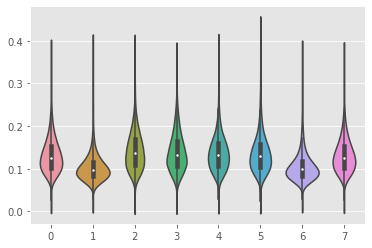

In [12]:
import seaborn as sns
my_dict = {idx: c_d for idx, c_d in enumerate(cat_pat_dist)}
# sns.boxplot(data = cat_pat_dist)
sns.violinplot(data=cat_pat_dist)

# Working with different Data Files

## .txt

### Part 1: store words in a list

<blockquote>

Tokenization in NLP is a researched topic and there are multiple methods to do this task. Here for simplification we remove all non alpha characters, (With an exemption for ' to discriminate "it's" and "its"). As there are no specific instructions in the question about what should be considered as a word/token, we use the aforementioned assumption.

In [13]:
with open("data/zen_of_python.txt", "r") as f:
    lines = f.read()
# As we need words, we should only keep A-z and space
alpha = ''.join(filter(lambda x: x.isalpha() or x.isspace() or x == "'", lines))  
unique_words = sorted(list(set(alpha.split())))
print(unique_words)

['Although', 'Beautiful', 'Complex', 'Dutch', 'Errors', 'Explicit', 'Flat', 'If', 'In', 'Namespaces', 'Now', 'Peters', 'Python', 'Readability', 'Simple', 'Sparse', 'Special', 'The', 'There', 'Tim', 'Unless', 'Zen', 'a', 'ambiguity', 'and', 'are', "aren't", 'at', 'bad', 'be', 'beats', 'better', 'break', 'by', 'cases', 'complex', 'complicated', 'counts', 'dense', 'do', 'easy', 'enough', 'explain', 'explicitly', 'face', 'first', 'good', 'great', 'guess', 'hard', 'honking', 'idea', 'implementation', 'implicit', 'is', 'it', "it's", "let's", 'may', 'more', 'nested', 'never', 'not', 'now', 'obvious', 'of', 'often', 'one', 'only', 'pass', 'practicality', 'preferably', 'purity', 'refuse', 'right', 'rules', 'should', 'silenced', 'silently', 'special', 'temptation', 'than', 'that', 'the', 'those', 'to', 'ugly', 'unless', 'way', "you're"]


### Part 2: Occurrence of each character

In [14]:
from collections import Counter
char_count = Counter(lines)
print("Method1:", char_count.most_common())

# W/O/ libraries
char_count_2 = dict()
for c in lines:
    char_count_2[c] = char_count_2.get(c, 0) + 1
print("Method2:", char_count_2)

Method1: [(' ', 124), ('e', 90), ('t', 76), ('i', 50), ('a', 50), ('o', 43), ('s', 43), ('n', 40), ('l', 33), ('r', 32), ('h', 31), ('b', 20), ('\n', 20), ('u', 20), ('p', 20), ('.', 18), ('y', 17), ('m', 16), ('c', 16), ('d', 16), ('f', 11), ('g', 11), ('x', 6), ('-', 6), ('v', 5), (',', 4), ("'", 4), ('w', 4), ('T', 3), ('S', 3), ('A', 3), ('I', 3), ('P', 2), ('E', 2), ('k', 2), ('N', 2), ('*', 2), ('Z', 1), ('B', 1), ('C', 1), ('F', 1), ('R', 1), ('U', 1), ('D', 1), ('!', 1)]
Method2: {'T': 3, 'h': 31, 'e': 90, ' ': 124, 'Z': 1, 'n': 40, 'o': 43, 'f': 11, 'P': 2, 'y': 17, 't': 76, ',': 4, 'b': 20, 'i': 50, 'm': 16, 'r': 32, 's': 43, '\n': 20, 'B': 1, 'a': 50, 'u': 20, 'l': 33, 'g': 11, '.': 18, 'E': 2, 'x': 6, 'p': 20, 'c': 16, 'S': 3, 'C': 1, 'd': 16, 'F': 1, 'R': 1, "'": 4, 'k': 2, 'A': 3, 'v': 5, 'U': 1, 'I': 3, '-': 6, 'w': 4, 'D': 1, 'N': 2, '*': 2, '!': 1}


### Part 3: Occurrence of each word

In [15]:
word_count = Counter(alpha.split())
print("Method1:", word_count.most_common())

# W/O/ libraries
word_count_2 = dict()
for w in alpha.split():
    word_count_2[w] = word_count_2.get(w, 0) + 1
print("Method2: ", word_count_2)

Method1: [('is', 10), ('better', 8), ('than', 8), ('to', 5), ('the', 5), ('of', 3), ('Although', 3), ('never', 3), ('be', 3), ('one', 3), ('idea', 3), ('should', 2), ('obvious', 2), ('way', 2), ('do', 2), ('it', 2), ('may', 2), ('If', 2), ('implementation', 2), ('explain', 2), ('a', 2), ('The', 1), ('Zen', 1), ('Python', 1), ('by', 1), ('Tim', 1), ('Peters', 1), ('Beautiful', 1), ('ugly', 1), ('Explicit', 1), ('implicit', 1), ('Simple', 1), ('complex', 1), ('Complex', 1), ('complicated', 1), ('Flat', 1), ('nested', 1), ('Sparse', 1), ('dense', 1), ('Readability', 1), ('counts', 1), ('Special', 1), ('cases', 1), ("aren't", 1), ('special', 1), ('enough', 1), ('break', 1), ('rules', 1), ('practicality', 1), ('beats', 1), ('purity', 1), ('Errors', 1), ('pass', 1), ('silently', 1), ('Unless', 1), ('explicitly', 1), ('silenced', 1), ('In', 1), ('face', 1), ('ambiguity', 1), ('refuse', 1), ('temptation', 1), ('guess', 1), ('There', 1), ('and', 1), ('preferably', 1), ('only', 1), ('that', 1), 

### Part 4: Define a function for saving stats at the end of `.txt` file

In [19]:
from collections import Counter
def append_stats(txt_path: str):
    with open(txt_path, "r") as f:
        lines = f.read()
        next_lines = len(lines.split("\n"))
        alpha = ''.join(filter(lambda x: x.isalpha() or x.isspace() or x == "'", lines))  
        char_count = Counter(lines)
        word_count = Counter(alpha.split())
    print(next_lines, "\n", sum(char_count.values()), "\n", sum(word_count.values()))
    with open(f"{txt_path}", "a") as f:
        f.write(f"\n\n#lines: {next_lines}\n")
        f.write(f"#chars: {sum(char_count.values())}\n")
        f.write(f"#words: {sum(word_count.values())}\n")
        f.write(f"char_count: {char_count.most_common()}\n")
        f.write(f"word_count: {word_count.most_common()}")

### Part 5: Apply your defined function on 'zen_of_python.txt`

In [20]:
append_stats("data/zen_of_python.txt")

21 
 856 
 143


## csv

### Part 1: number of features and data points

In [21]:
import pandas as pd

df = pd.read_csv("data/patents.csv")
print(f"Features: {len(df.columns)}")
df.head(2)

Features: 5


,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6


In [ ]:
print(f"Data Points: {len(df)}")

Data Points: 15689


### Part 2: Name of Features

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['publication_number', 'title', 'cpc_code', 'patent_embedding',
       'category'],
      dtype='object')
publication_number    object
title                 object
cpc_code              object
patent_embedding      object
category               int64
dtype: object


### Part 3: Print Stats of Dataframe

<blockquote>

Only category is int64, so describe will summarize its statistics.

In [ ]:
df.describe()

,category
count,15689.000000
mean,3.854229
std,2.499307
min,0.000000
25%,1.000000
50%,4.000000
75%,6.000000
max,7.000000


### Part 4: print rows.

In [ ]:
# 5 first rows
df.head(5)

,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0


In [ ]:
# 5 last rows
df.tail(5)

,publication_number,title,cpc_code,patent_embedding,category
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6
15688,CN-100513251-C,system and process for open cover vessel hull,B63B71/00,[-1.98921170e-02 3.07969116e-02 -2.46879123e-...,6


In [ ]:
# 5 random row
df.sample(5)

,publication_number,title,cpc_code,patent_embedding,category
9783,US-4376819-A,biological extract and method for make same,G01N33/579,[-6.81845332e-03 4.12613228e-02 -5.69647290e-...,6
12991,KR-20050006142-A,door assembly,E06B9/54,[ 0.0101653 -0.0334826 -0.0123644 0.095703...,3
664,US-2016270056-A1,mechanism for association request signal betwe...,H04W72/048,[ 0.0065193 0.02637018 0.00265789 0.051435...,4
10880,AT-163147-T,chill tool especially drill or mill tool,B23B51/02,[ 1.43228630e-02 -3.09319381e-04 -4.20781337e-...,1
15156,US-9970096-B2,intaglio print plate coating apparatus,C23C14/24,[ 1.34186447e-03 7.26594850e-02 -9.27347969e-...,4


### Part 5: use iloc and loc to select rows

<blockquote>

loc selects rows and columns with specific labels. iloc selects rows and columns at specific integer positions.
Here that the index was also the ordered number, they became very similar. This difference shows itself more in examples like the course dataframe when the index was changed to the name of countries for instance.

In [22]:
# loc
print(df.dtypes)
df.loc[1024:2048, "title"]

publication_number    object
title                 object
cpc_code              object
patent_embedding      object
category               int64
dtype: object


1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

In [23]:
# iloc
df["title"].iloc[1024:2049]

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

### Part 5: Check Dataframe for NaN values

<blockquote>

As seen below, there are no NaN values in any features

In [24]:
df.isnull().sum()

publication_number    0
title                 0
cpc_code              0
patent_embedding      0
category              0
dtype: int64

### Part 6: Check Dataframe for duplicates

<blockquote>

As shown below, this dataset has 9 duplicate rows. (Not necessarily all the same)

In [25]:
print(df.duplicated().sum())
df[df.duplicated()]

9


,publication_number,title,cpc_code,patent_embedding,category
1739,AU-2011202417-A1,a wall form in soil the wall include a hollow ...,E02D5/18,[ 3.92072555e-03 3.35453786e-02 -2.88293511e-...,1
5696,EP-3096560-A4,method and user equipment for block network ac...,H04W48/06,[-3.0044878e-02 -4.4037402e-05 -2.3655588e-02 ...,6
6496,US-2018076003-A1,method and apparatus for a porous electrospray...,H01J37/08,[ 0.02056626 0.04025198 -0.04704187 0.061253...,1
6962,US-2018328001-A1,boom assembly for a trencher,E02F5/14,[ 1.52878952e-03 3.42151672e-02 -4.17193323e-...,1
9408,JP-5702147-B2,electroactive material,H01L51/0035,[ 0.01078738 -0.01581865 -0.01463019 0.023458...,2
9980,JP-6373410-B2,end of life determination and prediction for i...,A61N1/36128,[-3.00560612e-03 5.31513337e-03 -1.25307012e-...,6
11142,AU-2012324531-A1,biomarkers useful for detection of type grade ...,C12Q1/6886,[ 0.01898381 0.01144431 -0.04808485 0.079074...,1
13850,US-2018042871-A1,bicyclic analgesic compound,A61K31/16,[ 4.39326465e-02 -1.77983195e-02 -8.26886818e-...,2
14823,HK-1225899-A1,apparatus system and method of secure communic...,H04W12/04,[-0.00121724 -0.00263928 0.0009811 0.056798...,6


### Part 7: Use `Lambda` Function for calculating word counts

In [26]:
df["title_length"] = df["title"].apply(lambda x: len(x.split()))
df.head(2)

,publication_number,title,cpc_code,patent_embedding,category,title_length
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1,6
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6,2


### Part 8: Plot Histogram of Word counts

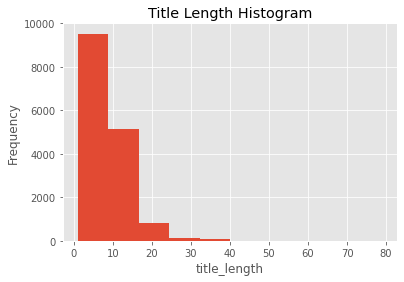

In [30]:
import matplotlib.pyplot as plt
df.hist("title_length")
plt.title("Title Length Histogram")
plt.xlabel("title_length")
plt.ylabel("Frequency")
plt.show()

## Log

### Part 1: Number of Total Commits

In [31]:
import datetime
from tqdm.auto import tqdm

def parse_git_log(log_path: str) -> list():
    with open(log_path, 'r') as f:
        lines = f.readlines()
    commits = list()
    IN_MESSAGE = False
    for line in tqdm(lines):
        line = line[:-1]
        if line.startswith("commit"):
            commit_obj = {
                "commit": line.split()[-1],
                "author": None,
                "date": None,
                "files": list(), 
                "message": ""
            }
            commits.append(commit_obj)
        elif line.startswith("Author:"):
            commit_obj["author"] = ' '.join(line.split()[1:-1])
            commit_obj["email"] = line.split()[-1][1:-1]
        elif line.startswith("Date:"):
            commit_obj["date"] = datetime.datetime.strptime(
                ' '.join(line.split()[1:]), 
                '%a %b %d %H:%M:%S %Y %z')
        elif line == '' and len(commit_obj["files"]) == 0:
            IN_MESSAGE = not IN_MESSAGE
        elif IN_MESSAGE:
            commit_obj["message"] += f"{line}\n"
        elif "\t" in line:
            commit_obj["files"].append(line)
    return commits
        
git_logs = parse_git_log("data/git_log.log")
print("#Commits:", len(git_logs))
git_raw_df = pd.DataFrame(git_logs)
git_raw_df.head(2)

  0%|          | 0/8257 [00:00<?, ?it/s]

#Commits: 536


,commit,author,date,files,message,email
0,4d3d9de655faa813781027d8b1baed819c6a56fe,Markus Harrer,2019-03-05 22:32:20+01:00,"[20\t1\tjqassistant/business.adoc, 1\t1\tsrc/m...",add virtual bounded contexts\n,feststelltaste@googlemail.com
1,b836a492b2d5916397be9880f548121a9b398db1,Markus Harrer,2019-03-05 13:38:07+01:00,[18\t0\tsrc/main/java/org/springframework/samp...,add support for virtual refactorings\n,feststelltaste@googlemail.com


### Part 2: Extract Developer name, Email, Commit Count and last commit date and create a Dataframe

In [32]:
git_df = git_raw_df
git_df['commit_count'] = git_df.groupby('email')['email'].transform('count')
git_df = git_df.drop(["commit", "files", "message"], axis=1)
git_df = git_df.sort_values('date').groupby('email').tail(1)
git_df = git_df.rename({'date': 'last_commit_date', 'author': 'developer'}, axis=1)
git_df

,developer,last_commit_date,email,commit_count
497,Thomas Risberg,2009-12-14 22:13:04+00:00,trisberg@vmware.com,1
472,Keith Donald,2010-02-18 22:11:04+00:00,kdonald@vmware.com,35
471,Costin Leau,2010-07-19 14:20:39+00:00,cleau@vmware.com,28
470,Chris Beams,2010-09-02 07:51:24+00:00,cbeams@vmware.com,1
407,Rossen Stoyanchev,2013-02-10 18:16:18-05:00,rstoyanchev@vmware.com,2
377,Gordon Dickens,2013-02-19 11:10:37-05:00,gordon@gordondickens.com,5
365,Julien Dubois,2013-02-25 22:40:24+01:00,jdubois@ippon.fr,2
302,TejasM,2013-05-27 14:28:24-04:00,tejasmehta0@gmail.com,1
289,boly38,2013-07-12 10:22:38+02:00,boly38@gmail.com,1
284,Cyrille Le Clerc,2013-08-10 19:49:01+02:00,cyrille@cyrilleleclerc.com,5


### Part 3: Developers with Maximum and Minimum Commit count

In [33]:
git_df.sort_values("commit_count").head(5)

,developer,last_commit_date,email,commit_count
497,Thomas Risberg,2009-12-14 22:13:04+00:00,trisberg@vmware.com,1
77,AndrejGajdos,2016-07-28 13:50:07+02:00,Andrej1,1
78,Mike Eltsufin,2016-07-22 11:31:12-04:00,meltsufin@google.com,1
89,Dapeng,2016-06-27 17:06:47+08:00,verydapeng@gmail.com,1
91,Ameya Pandilwar,2016-06-19 02:23:53-04:00,ameya@pandilwar.com,1


In [34]:
git_df.sort_values("commit_count", ascending=False).head(5)  # We could use tail instead of head and remove ascending=False

,developer,last_commit_date,email,commit_count
240,Mic,2014-08-26 10:51:01+08:00,misvy@vmware.com,206
34,Dirk Mahler,2017-10-24 16:48:23+02:00,dirk.mahler@buschmais.com,55
115,michaelisvy,2016-02-06 15:02:14+08:00,"misvy@gopivotal,com",52
114,Antoine Rey,2016-02-06 18:55:52+01:00,antoine.rey@free.fr,41
472,Keith Donald,2010-02-18 22:11:04+00:00,kdonald@vmware.com,35


## Json

### Part 1: Create Dataframe from Json files

In [35]:
import json
import os
from tqdm.auto import tqdm
import pandas as pd
import datetime

df_list = []
for file_name in tqdm(os.listdir("data/Videos/")):
    with open(f"data/Videos/{file_name}", "r") as f:
        j = json.load(f)
        df_list.append(
            {
                "Title": j["title"],
                "Lang": j["language"],
                "Record_date": pd.to_datetime(j["recorded"]),
                "url": j["videos"][0]["url"],
                "Description": j["description"],
                "Category": j.get("category", None),
                "Tags": j.get("tags", None),
                "Speakers": j["speakers"],
                "Duration": j["duration"]
            }
        )


df = pd.DataFrame(df_list)
print(df.dtypes)
df

  0%|          | 0/244 [00:00<?, ?it/s]

Title                  object
Lang                   object
Record_date    datetime64[ns]
url                    object
Description            object
Category               object
Tags                   object
Speakers               object
Duration              float64
dtype: object


,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration
0,Using Python for Blender Animations,eng,2010-06-10,https://archive.org/details/pyvideo_575___usin...,A walk through using Blender 2.5's new Python ...,ChiPy,"[blender, chipy, chriswebber]",[Christopher Allan Webber],NaN
1,Web Apps with Jython,eng,2009-05-15,https://archive.org/details/pyvideo_590___web-...,Building apps with Jython\n\nPresented on May ...,ChiPy,"[chipy, go_pylons, jython, snakefight, wsgi]",[],NaN
2,ROS - Robot Operating System,eng,2011-01-13,https://archive.org/details/pyvideo_571___ros-...,,ChiPy,"[chipy, robot, ros]","[Bill Mania, Brian Ray]",NaN
3,"Create a full stack, reactive website in Djang...",eng,2021-06-03,https://www.youtube.com/watch?v=wMiZIK8p6DQ,"Django is a great web framework for ""perfectio...",None,"[Django, DjangoConEU, djangoconeu2021]",[Adam Hill],2542.0
4,Winning Machine Learning Competitions With Sci...,eng,2015-04-10,https://www.youtube.com/watch?v=gDbaCIE0mrA,This tutorial will offer an introduction machi...,PyCon US 2015,[],[Ben Hamner],NaN
...,...,...,...,...,...,...,...,...,...
239,Terminal whispering,eng,2015-04-12,https://www.youtube.com/watch?v=WAitSilLDUA,Have you ever wanted to add a status bar to yo...,PyCon US 2015,[],[Thomas Ballinger],NaN
240,Introduction to Spark with python,eng,2015-04-12,https://www.youtube.com/watch?v=9xYfNznjClE,In this tutorial we will cover the basics of w...,PyCon US 2015,[],[Orlando Karam],NaN
241,What Python can learn from Erlang,eng,2015-04-11,https://www.youtube.com/watch?v=EmICpC_QmhI,,PyCon US 2015,[],[Benoit Chesneau],NaN
242,IPython & Jupyter in depth: high productivity ...,eng,2015-04-09,https://www.youtube.com/watch?v=05fA_DXgW-Y,IPython and Jupyter provide tools for interact...,PyCon US 2015,[],"[Kyle Kelley, Thomas Kluyver]",NaN


### Part 2: Handle Missing Values

<blockquote>

From the NaN values below, we can only fill Duration as it is numerical and we can use interpolation or other methods to generate a value for it. Others like category or tags can be filled with empty values. (We can also use the most frequent category/tags but still can be very misleading and just a guess)

Since the data we have has no time series property like the ones investigated in the course, it is not sensible to use bfill or ffill. Therefore, we use mean for NaN values in duration.

In [36]:
print(df.isnull().sum())
df["Category"] = df["Category"].fillna("")
df["Tags"] = df["Tags"].fillna("")
df["Duration"] = df["Duration"].fillna(df["Duration"].mean())
print("\nAfter fillna:")
print(df.isnull().sum())

Title            0
Lang             0
Record_date      0
url              0
Description      0
Category        35
Tags             5
Speakers         0
Duration       176
dtype: int64

After fillna:
Title          0
Lang           0
Record_date    0
url            0
Description    0
Category       0
Tags           0
Speakers       0
Duration       0
dtype: int64


### Part 3: Title of videos published in 2016

In [37]:
df[df["Record_date"].dt.year == 2016]["Title"]

109         The wonder and the horror of the mock module
192    Python-based data science to understand knowle...
235                              ChiPy Python Mentorship
Name: Title, dtype: object

### Part 4: Mean, Min, Max, Median of Duration for each Category

In [38]:
df.groupby("Category")["Duration"].agg(['mean', 'min', 'max', 'median', 'count'])

,mean,min,max,median,count
Category,,,,,
,2481.771429,300.000000,4328.000000,2535.000000,35
ChiPy,1011.751765,4.000000,3600.000000,1479.485294,75
PyCon US 2015,1479.485294,1479.485294,1479.485294,1479.485294,134


### Part 5: Create `label` Column

In [40]:
def label_func(x):
    if x < 1000:
        return 1
    if 1000 < x < 2000:
        return 2
    if x >= 2000:
        return 3

df["label"] = df["Duration"].apply(label_func)
df.sample(5)

,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration,label
111,"Avoiding Burnout, and other essentials of Open...",eng,2015-04-12,https://www.youtube.com/watch?v=RbeHBnWfXUc,As technical community managers we are faced w...,PyCon US 2015,[],[Kathleen Danielson],1479.485294,2
53,How Open Source Hardware Will Change the World,eng,2013-11-14,https://archive.org/details/pyvideo_2450___How...,,ChiPy,[],[Paul Ebreo],8.000000,1
20,Hacking Django Channels for Fun and Profit,eng,2021-06-03,https://www.youtube.com/watch?v=DK74vjuhpuM,- Intro and Backstory on Django Channels histo...,,"[Django, DjangoConEU, djangoconeu2021]",[Calvin Hendryx-Parker],1738.000000,2
98,My Python's a little Rust-y,eng,2015-04-11,https://www.youtube.com/watch?v=3CwJ0MH-4MA,Rust is a new systems programming language fro...,PyCon US 2015,[],[Dan Callahan],1479.485294,2
41,Facts and Myths about Python names and values,eng,2015-04-11,https://www.youtube.com/watch?v=_AEJHKGk9ns,The behavior of names and values in Python can...,PyCon US 2015,[],[Ned Batchelder],1479.485294,2


### Part 6: First and Last video of each label

In [43]:
df.sort_values("Record_date").groupby("label")[["Title", "Record_date"]].agg(["first", "last"])  # Record_date can be removed (just for clarification)

Title  \
                                                   first   
label                                                      
1                                In-project virtualenvs    
2      ChiPy: Chicago Python User Group Jan. '08 Meeting   
3                                 Pingo means "pin, go!"   

                                                        Record_date             
                                                   last       first       last  
label                                                                           
1                               ChiPy Python Mentorship  2013-05-09 2016-03-10  
2      Load Testing a Django Application using LocustIO  2008-01-01 2021-06-04  
3                             Serving Files with Django  2014-07-09 2021-06-04

### (Bonus) part 7: WordCloud of Discription

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('python', 118), ('django', 86), ('talk', 84), ('use', 72), ('using', 53), ('web', 49), ('data', 43), ('code', 40), ('build', 31), ('like', 31), ('learn', 31), ('make', 29), ("we'll", 28), ('get', 27), ('new', 26), ('application', 26), ('also', 25), ('tutorial', 24), ('want', 24), ('show', 23), ('software', 23), ('framework', 22), ('cover', 21), ('applications', 20), ('programming', 20), ('know', 20), ('rest', 20), ('way', 20), ('learning', 19), ('used', 19), ('performance', 19), ("i'll", 19), ('many', 19), ('language', 18), ('best', 18), ('introduction', 17), ('scientific', 17), ('tools', 16), ('testing', 16), ('development', 16), ('features', 16), ('open', 16), ('help', 15), ('developers', 15), ('good', 15), ('different', 15), ('look', 15), ('common', 14), ('source', 14), ('project', 14)]


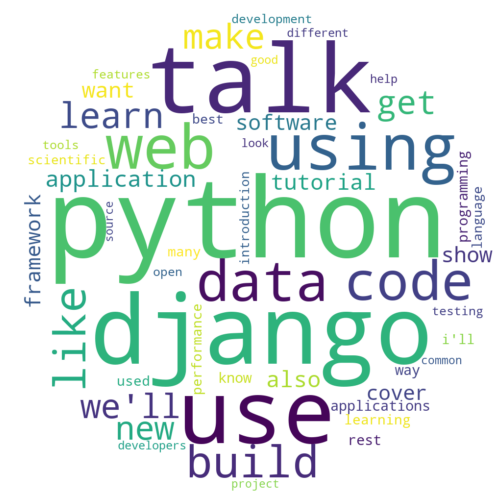

In [44]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

wordcloud = WordCloud()
nltk.download('stopwords')

words = (' '.join(df["Description"])).lower().split()
filtered_words = [word for word in words if word not in stopwords.words('english') + ["-"]]
c = Counter(filtered_words).most_common(50)
print(c)

x, y = np.ogrid[:1000, :1000]
mask = (x - 500) ** 2 + (y - 500) ** 2 > 500 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(max_words=50, background_color='white', mask=mask).generate_from_frequencies(dict(c))
plt.figure(figsize=(9, 9))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilInear')

In [ ]:
! jupyter nbconvert --to html /content/DA_HW1_MohsenFayyaz.ipynb

[NbConvertApp] Converting notebook /content/DA_HW1_MohsenFayyaz.ipynb to html
[NbConvertApp] Writing 711551 bytes to /content/DA_HW1_MohsenFayyaz.html
